In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import holidays

import set_matplotlib_hangul

import warnings

warnings.filterwarnings(action='ignore')

%matplotlib inline

Hangul Setting OK for Mac


In [2]:
train_raw = pd.read_csv('./따릉이 수요량 예측/train.csv')
submission = pd.read_csv('./따릉이 수요량 예측/sample_submission.csv')

In [3]:
train_raw.head()

,일시,광진구,동대문구,성동구,중랑구
0,20180101,0.592,0.368,0.580,0.162
1,20180102,0.840,0.614,1.034,0.260
2,20180103,0.828,0.576,0.952,0.288
3,20180104,0.792,0.542,0.914,0.292
4,20180105,0.818,0.602,0.994,0.308


In [4]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      1461 non-null   int64  
 1   광진구     1461 non-null   float64
 2   동대문구    1461 non-null   float64
 3   성동구     1461 non-null   float64
 4   중랑구     1461 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 57.2 KB


In [5]:
submission.head()

,일시,광진구,동대문구,성동구,중랑구
0,20220101,0,0,0,0
1,20220102,0,0,0,0
2,20220103,0,0,0,0
3,20220104,0,0,0,0
4,20220105,0,0,0,0


In [6]:
train_raw['일시']= train_raw['일시'].astype('str')
train_raw['일시']= pd.to_datetime(train_raw['일시'])

In [7]:
#구별로 데이터 분할
df_광진구 = train_raw.drop(['동대문구','성동구','중랑구'],axis=1)
df_동대문구 = train_raw.drop(['광진구','성동구','중랑구'],axis=1)
df_성동구 = train_raw.drop(['광진구','동대문구','중랑구'],axis=1)
df_중랑구 = train_raw.drop(['광진구','동대문구','성동구'],axis=1) 

In [8]:
df_list = [df_광진구, df_동대문구, df_성동구, df_중랑구]

In [9]:
for df_gu in df_list:
    y_list = []
    m_list = []
    d_list = []
    wd_list = []
    for idx, row in df_gu.iterrows():
        y_list.append(row['일시'].year)
        m_list.append(row['일시'].month)
        d_list.append(row['일시'].day)
        wd_list.append(row['일시'].weekday())

    df_gu['년'] = y_list
    df_gu['월'] = m_list
    df_gu['요일'] = wd_list
    # df_gu.drop(['일시'], axis=1, inplace=True)



In [10]:
df_광진구.rename(columns={'광진구' : 'y', '일시' : 'ds'}, inplace=True)
df_동대문구.rename(columns={'동대문구' : 'y','일시' : 'ds' },inplace=True)
df_성동구.rename(columns={'성동구' : 'y','일시' : 'ds' },inplace=True)
df_중랑구.rename(columns={'중랑구' : 'y', '일시' : 'ds'},inplace=True)
df_광진구['지역구'] = '광진구'
df_동대문구['지역구'] = '동대문구'
df_성동구['지역구'] = '성동구'
df_중랑구['지역구'] = '중랑구'

In [11]:
holidays_kr = []
for yr in range(2018,2023):
    for holi in holidays.KR(years = yr).items():
       holidays_kr.append(holi[0]) 

In [12]:
holidays_df = pd.DataFrame({
    'holiday' : 'holiday',
    'ds' : holidays_kr
})

In [13]:
df = pd.concat([df_광진구,df_동대문구,df_성동구,df_중랑구])

In [14]:
df.sort_values('ds')

,ds,y,년,월,요일,지역구
0,2018-01-01,0.592,2018,1,0,광진구
0,2018-01-01,0.580,2018,1,0,성동구
0,2018-01-01,0.162,2018,1,0,중랑구
0,2018-01-01,0.368,2018,1,0,동대문구
1,2018-01-02,0.840,2018,1,1,광진구
...,...,...,...,...,...,...
1459,2021-12-30,4.444,2021,12,3,광진구
1460,2021-12-31,3.210,2021,12,4,동대문구
1460,2021-12-31,3.616,2021,12,4,광진구
1460,2021-12-31,2.620,2021,12,4,성동구


In [15]:
df_month_median = df.pivot_table(index=['년','월'], columns=['지역구'], values=['y'], aggfunc=np.median)
df_month_median

y                      
지역구         광진구   동대문구     성동구    중랑구
년    월                               
2018 1    0.598  0.414   0.636  0.188
     2    0.716  0.463   0.783  0.233
     3    2.080  1.040   1.886  0.666
     4    3.340  1.974   3.290  1.183
     5    4.884  2.476   4.346  1.838
     6    5.368  2.869   4.759  2.158
     7    4.626  2.660   4.110  2.068
     8    4.242  2.262   3.426  1.734
     9    6.731  3.495   5.598  2.689
     10   5.858  3.452   4.908  2.398
     11   3.965  2.436   3.129  1.598
     12   1.958  1.188   1.648  0.860
2019 1    1.966  1.164   1.716  0.798
     2    2.102  1.208   1.694  0.789
     3    3.746  2.092   3.100  1.456
     4    7.027  3.444   5.334  2.429
     5    9.996  5.196   7.472  3.772
     6   10.251  5.588   7.434  4.108
     7    9.274  5.204   7.144  4.014
     8    8.560  4.704   6.302  3.590
     9   10.988  5.914   8.085  4.540
     10  10.398  5.642   7.870  4.420
     11   5.863  3.558   4.567  2.464
     12   3.486  2.170   2.698  1.492
2020 1    3.252  2.066   2.714  1.350
     2    3.128  2.094   2.416  1.362
     3    5.428  3.200   4.760  2.418
     4    8.325  5.043   7.669  4.035
     5    9.690  5.880   8.428  5.284
     6   10.198  7.155   8.651  5.750
     7    9.364  6.954   7.948  5.472
     8    4.618  3.950   4.390  3.062
     9   10.184  7.375   9.353  6.045
     10   8.350  6.862   7.698  5.550
     11   6.160  5.114   5.504  3.970
     12   3.878  3.054   3.258  2.240
2021 1    2.260  1.988   2.002  1.426
     2    4.114  3.401   3.775  2.477
     3    7.160  5.890   6.406  4.068
     4   10.488  8.229   9.209  5.992
     5   10.022  7.846   9.012  6.262
     6   10.609  9.098   9.087  6.396
     7   10.184  8.960   8.530  6.180
     8   10.896  9.054   8.876  6.444
     9   12.877  9.754  10.807  7.381
     10  10.536  8.548   8.630  6.330
     11   8.169  6.929   6.688  4.943
     12   5.460  4.854   4.224  3.252

### 주말과 평일의 이용량 차이

In [16]:
weekend = df_광진구[(df_광진구['요일'] == 5) | (df_광진구['요일'] == 6)]
weekily = df_광진구[(df_광진구['요일'] != 5) | (df_광진구['요일'] != 6)]

In [17]:
for df_gu in df_list:
    tmp = []
    for idx, rows in df_gu.iterrows():
        if (rows['요일'] == 5) or (rows['요일'] == 6):
            tmp.append('주말')
        else:
            tmp.append('평일')

    df_gu['주말'] = tmp


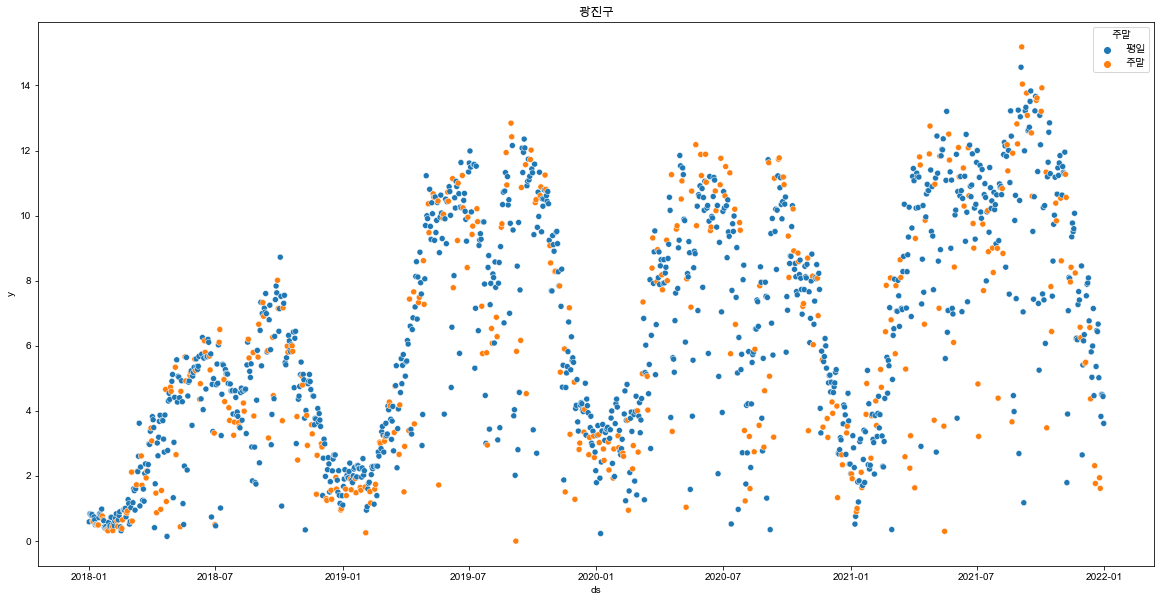

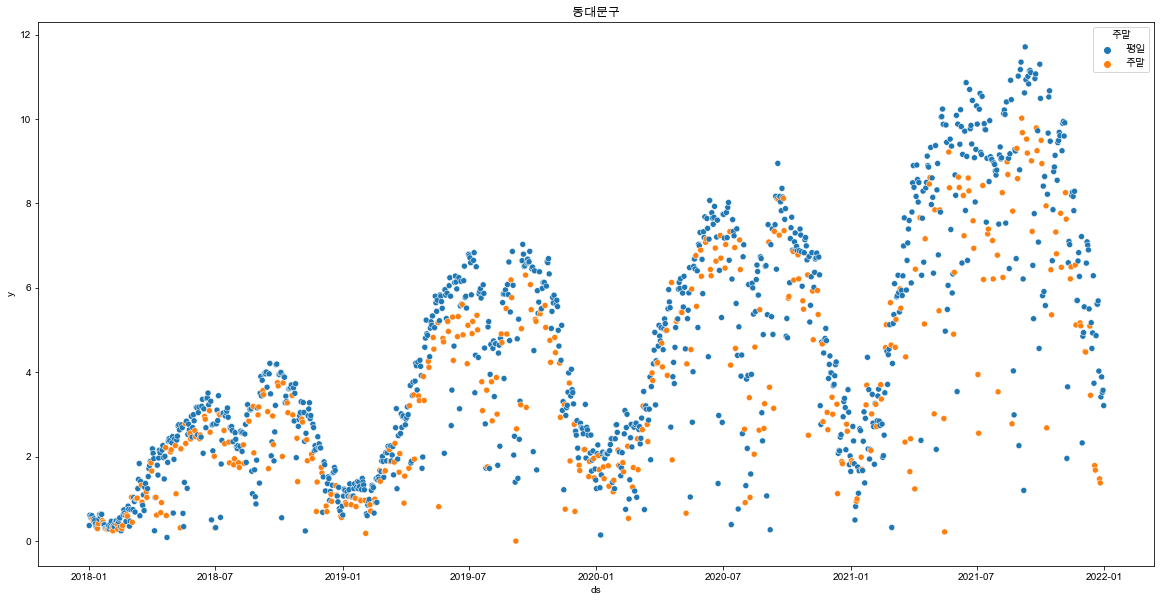

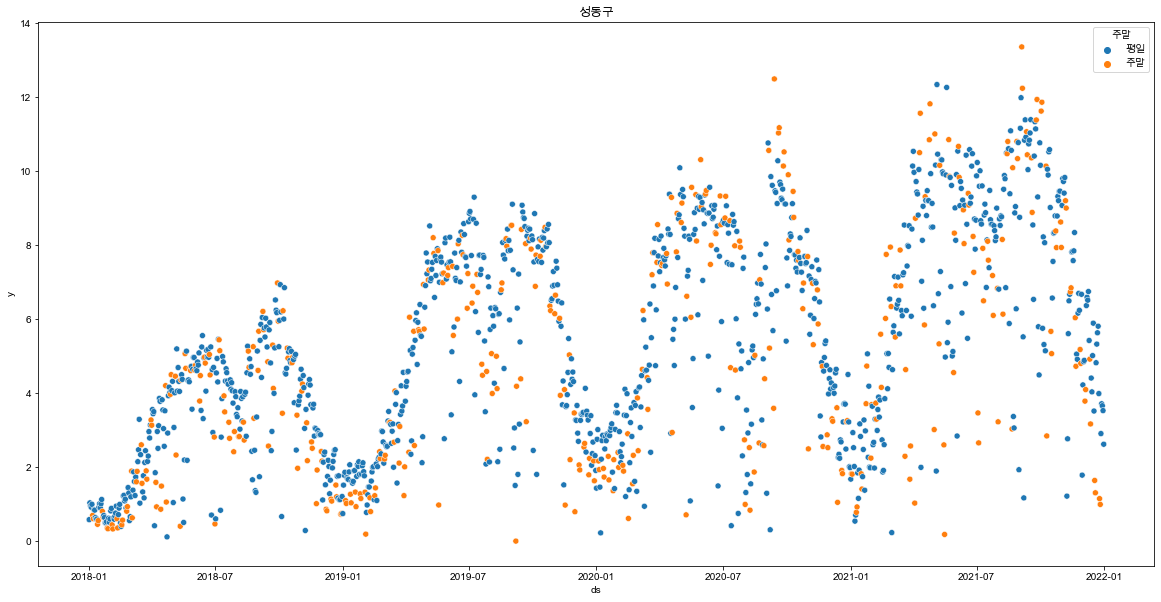

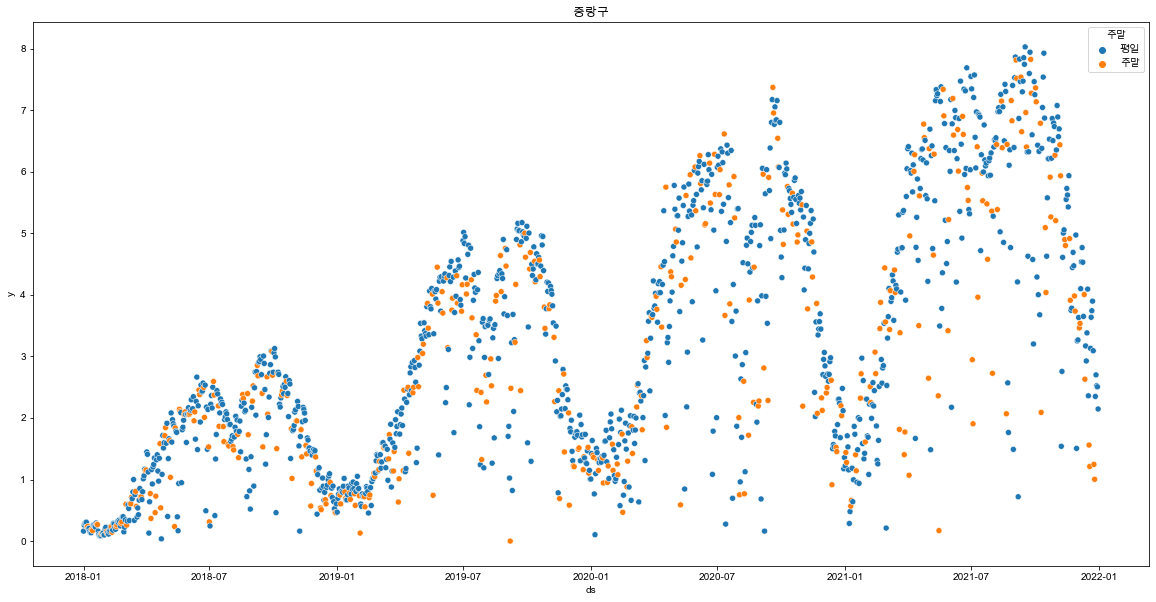

In [18]:
for df_gu in df_list:
    plt.figure(figsize=(20,10))
    sns.scatterplot(data = df_gu, x='ds', y='y', hue="주말")
    plt.title(str(df_gu['지역구'][0]))
    plt.show()

In [20]:
df = pd.concat([df_광진구,df_동대문구,df_성동구,df_중랑구])
df_weekday = df.pivot_table(index=['년', '주말'], columns=['지역구'], values=['y'], aggfunc=np.mean)
df_weekday

y                              
지역구           광진구      동대문구       성동구       중랑구
년    주말                                        
2018 주말  3.379038  1.780250  2.879365  1.368673
     평일  3.544061  2.044299  3.129195  1.411456
2019 주말  6.391596  3.225769  4.617346  2.538788
     평일  6.709762  3.856736  5.133962  2.735103
2020 주말  6.659308  4.260423  5.693442  3.580058
     평일  6.512168  4.772305  5.796977  3.741550
2021 주말  7.785365  5.735135  6.598308  4.482442
     평일  8.317257  7.029556  7.045211  4.897686

### 시계열 분석을 위한 Prophet 모델 사용
- 바닐라 Prophet으로 확인하고 하이퍼 파라미터를 수정 진행
- 하이퍼 파라미터 튜닝을 통해 MAE값이 가장 작은 값들을 사용
- 데이터가 점점 증가하는 형태의 진동을 하고 있기 때문에 'multiplicative'
- 공휴일에 대한 데이터는 패키지에서 제공해주는 기본 데이터를 사용함

#### Prophet 바닐라

In [21]:
from fbprophet import Prophet

In [22]:
train_광진구 = df_광진구[df_광진구['ds']<'20210101']
true_광진구  = df_광진구[df_광진구['ds']>='20210101']

m = Prophet()
m.fit(train_광진구)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -88.8329


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1593.75   1.04373e-05       63.5145      0.2004           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     112       1593.75   1.71268e-05        65.418   2.533e-07       0.001      193  LS failed, Hessian reset 
     131       1593.76   1.81997e-07       56.6694           1           1      220   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [23]:
future = m.make_future_dataframe(periods=365) # 2021년 데이터 예측
forecast_광진구 = m.predict(future)

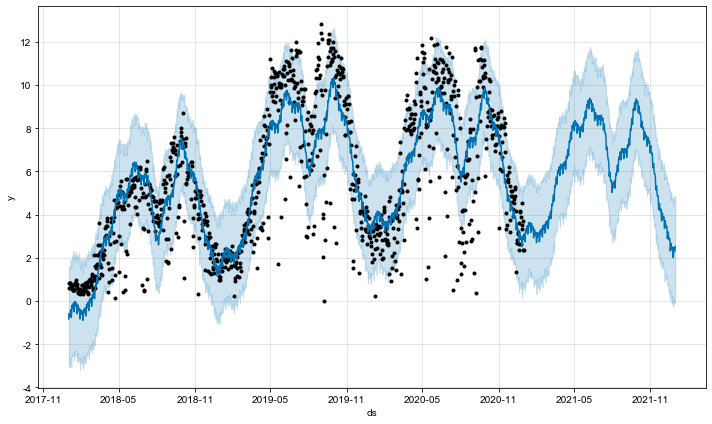

In [24]:
m.plot(forecast_광진구);

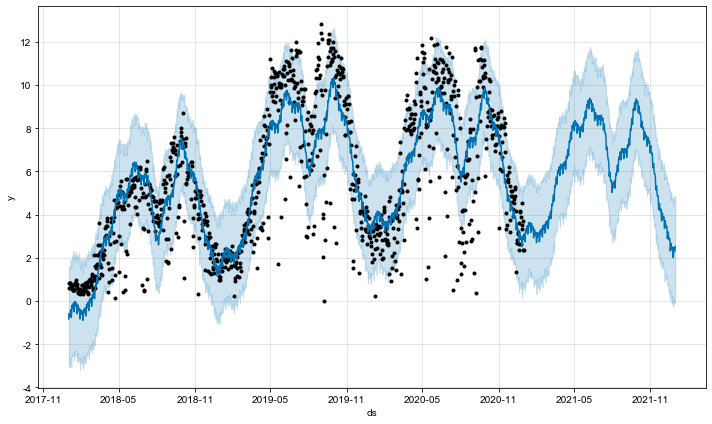

In [25]:
m.plot(forecast_광진구);

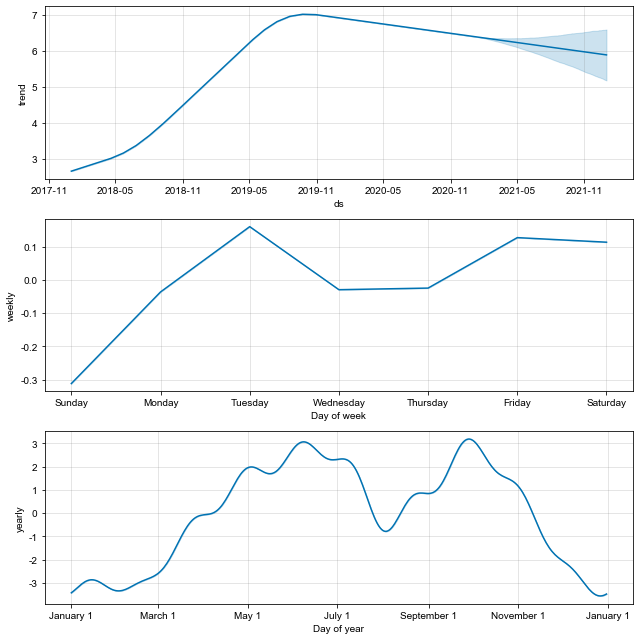

In [26]:
m.plot_components(forecast_광진구);

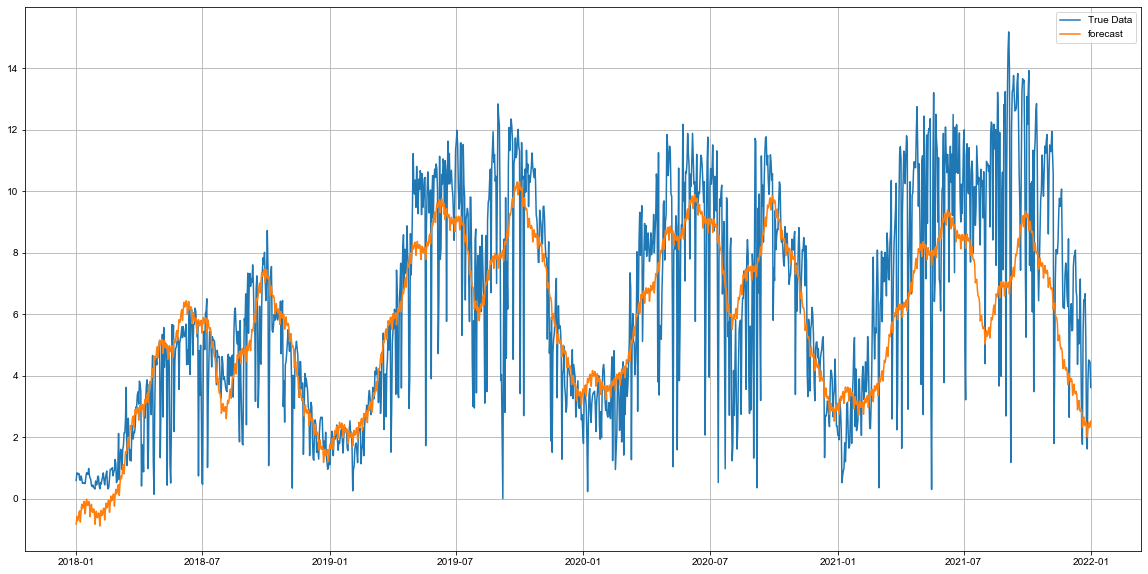

In [27]:
plt.figure(figsize=(20,10))
plt.plot(df_광진구['ds'],df_광진구['y'], label='True Data')
plt.plot(forecast_광진구['ds'], forecast_광진구['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

- 처음에는 얼추 비슷한 흐름을 맞춰가고 있는 것으로 보이나 2021년 데이터에서 흐름이 완전 무너짐
- 바닐라 모델에서 트렌드는 증가후 하락 추세로 보고 있음
- 하이퍼 파라미터 튜닝을 통해서 모델을 좀 더 정교하게 맞춰갈 필요성이 있음


### 하이퍼 파라마터 튜닝

In [28]:
from sklearn.model_selection import ParameterGrid

params_grid = {
    'changepoint_prior_scale' : [0.1, 0.2, 0.3, 0.4, 0.5],
    'seasonaility_prior_scale' : [5, 10, 12, 15],
    'yearly_seasonality' : [5,10,12,15],
    'holidays_prior_scale' : [5, 10, 12, 15]
    
}


grid = ParameterGrid(params_grid)

In [ ]:
from sklearn.metrics import mean_absolute_error

isBest = 999

for p in grid:
    test = pd.DataFrame()
    train_model = Prophet(changepoint_prior_scale=p['changepoint_prior_scale'],
                        seasonality_mode = 'multiplicative',
                        seasonality_prior_scale = p['seasonaility_prior_scale'],
                        daily_seasonality=True,
                        yearly_seasonality=p['yearly_seasonality'],
                        interval_width=0.9,
                        holidays=holidays_df,
                        holidays_prior_scale= p['holidays_prior_scale']
    )

    train_model.fit(train_광진구)
    train_future = train_model.make_future_dataframe(periods=365, freq='D',include_history=False)
    train_forecast = train_model.predict(train_future)
    MAE = mean_absolute_error(true_광진구['y'],train_forecast['yhat'])
    if MAE < isBest:
        isBest = MAE
        best_model = p
    

In [31]:
isBest, best_model

(2.0176707630861945,
 {'changepoint_prior_scale': 0.1,
  'holidays_prior_scale': 15,
  'seasonaility_prior_scale': 10,
  'yearly_seasonality': 5})

In [ ]:
proh_광진구  = Prophet(changepoint_prior_scale=0.1,
                        seasonality_mode = 'multiplicative',
                        seasonality_prior_scale = 10,
                        daily_seasonality=True,
                        yearly_seasonality=5,
                        interval_width=0.9,
                        holidays=holidays_df,
                        holidays_prior_scale= 15
    )
proh_광진구.fit(train_광진구)

In [36]:
future_광진구 = proh_광진구.make_future_dataframe(periods=365, freq='D')
forecast_광진구 = proh_광진구.predict(future_광진구)

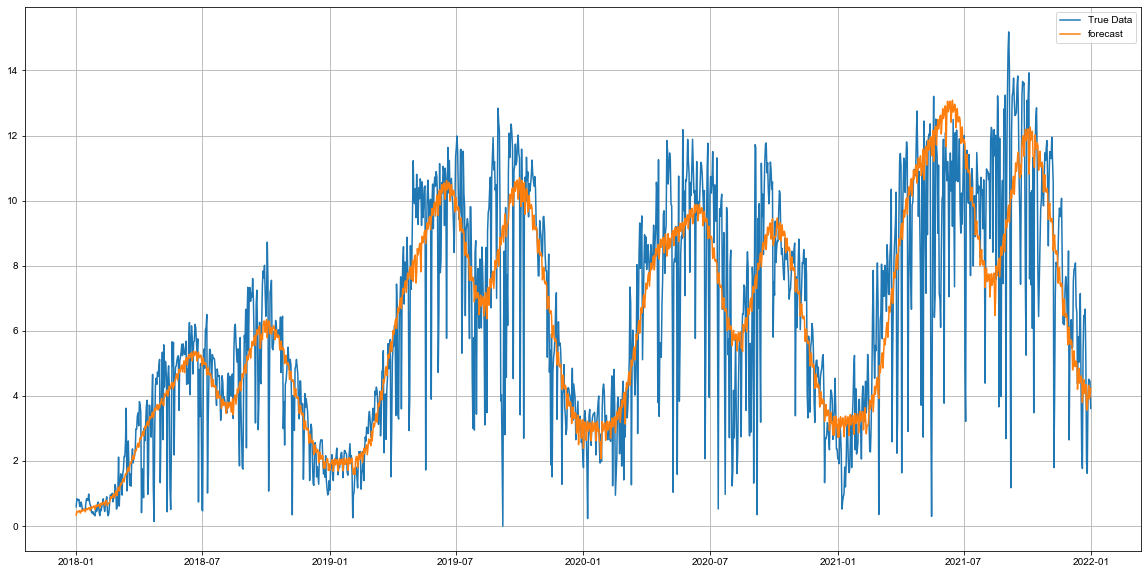

In [37]:
plt.figure(figsize=(20,10))
plt.plot(df_광진구['ds'],df_광진구['y'], label='True Data')
plt.plot(forecast_광진구['ds'], forecast_광진구['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

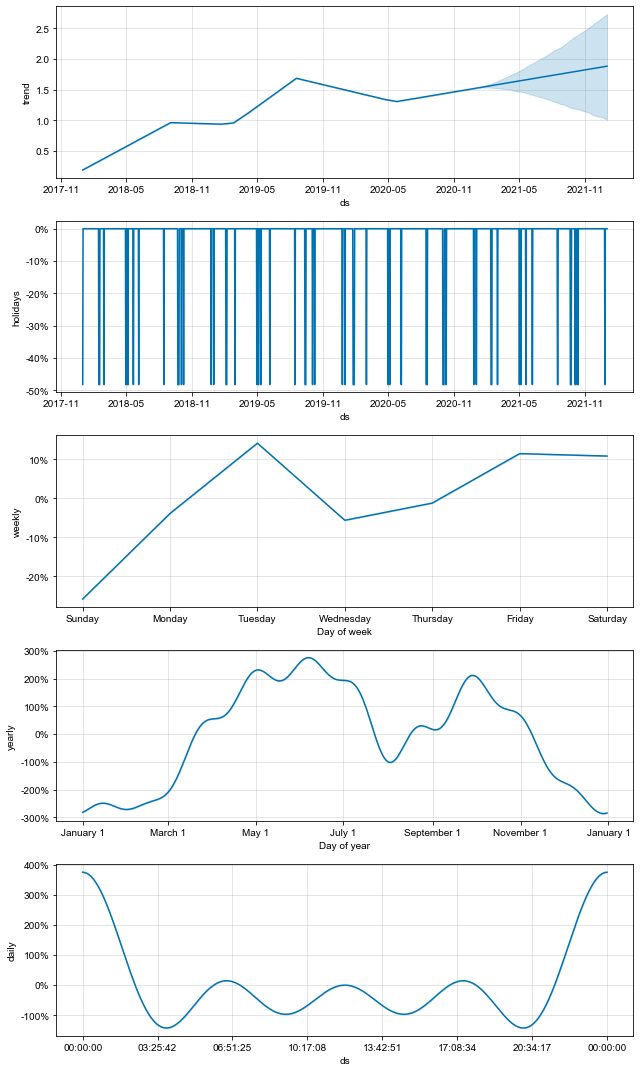

In [176]:
proh_광진구.plot_components(forecast_광진구);

- 바닐라 Prophet보다 높은 예측력을 보여주었다.
- 트렌드 역시 [증가 - 감소] 이후 '증가'하는 트렌드임을 잡아 냈음.
- 이 과정을 나머지 3가지 구에도 적용하고 2022년 데이터를 예측

In [44]:
# 과정 함수화

def getBestParams(df):

    isBest = 999

    train_df = df[df['ds']<'20210101']
    true_df  = df[df['ds']>='20210101']

    for p in grid:
        train_model = Prophet(changepoint_prior_scale=p['changepoint_prior_scale'],
                        seasonality_mode = 'multiplicative',
                        seasonality_prior_scale = p['seasonaility_prior_scale'],
                        daily_seasonality=True,
                        yearly_seasonality=p['yearly_seasonality'],
                        interval_width=0.9,
                        holidays=holidays_df,
                        holidays_prior_scale= p['holidays_prior_scale']
    )

        train_model.fit(train_df)
        train_future = train_model.make_future_dataframe(periods=365, freq='D',include_history=False)
        train_forecast = train_model.predict(train_future)
        MAE = mean_absolute_error(true_df['y'], train_forecast['yhat'])
    
        if MAE < isBest:
            isBest = MAE
            best_model = p
    return isBest, best_model

In [ ]:
best_mae_광진구, best_params_광진구 = getBestParams(df_광진구)
best_mae_동대문구, best_params_동대문구 = getBestParams(df_동대문구)
best_mae_성동구, best_params_성동구 = getBestParams(df_성동구)
best_mae_중랑구, best_params_중랑구 = getBestParams(df_중랑구)


In [48]:
print('광진구 Best Params : ', best_model)
print('동대문구 Best Params : ', best_params_동대문구)
print('성동구 Best Params : ', best_params_성동구)
print('중랑구 Best Params : ', best_params_중랑구)

광진구 Best Params :  {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 15, 'seasonaility_prior_scale': 10, 'yearly_seasonality': 5}
동대문구 Best Params :  {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 15, 'seasonaility_prior_scale': 15, 'yearly_seasonality': 10}
성동구 Best Params :  {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 10, 'seasonaility_prior_scale': 12, 'yearly_seasonality': 5}
중랑구 Best Params :  {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 5, 'seasonaility_prior_scale': 12, 'yearly_seasonality': 5}


In [55]:
best_mae_광진구, best_mae_동대문구, best_mae_성동구, best_mae_중랑구

(2.0176707630861945, 1.54899750835326, 1.743209320187124, 1.1345481583421564)

In [49]:
proh_광진구  = Prophet(changepoint_prior_scale=0.1,
                        seasonality_mode = 'multiplicative',
                        seasonality_prior_scale = 15,
                        daily_seasonality=True,
                        yearly_seasonality=5,
                        interval_width=0.9,
                        holidays=holidays_df,
                        holidays_prior_scale= 15
    )

proh_성동구  = Prophet(changepoint_prior_scale=0.1,
                        seasonality_mode = 'multiplicative',
                        seasonality_prior_scale = 12,
                        daily_seasonality=True,
                        yearly_seasonality=5,
                        interval_width=0.9,
                        holidays=holidays_df,
                        holidays_prior_scale= 10
    )

proh_동대문구  = Prophet(changepoint_prior_scale=0.1,
                        seasonality_mode = 'multiplicative',
                        seasonality_prior_scale = 15,
                        daily_seasonality=True,
                        yearly_seasonality=10,
                        interval_width=0.9,
                        holidays=holidays_df,
                        holidays_prior_scale= 15
    )

proh_중랑구  = Prophet(changepoint_prior_scale=0.5,
                        seasonality_mode = 'multiplicative',
                        seasonality_prior_scale = 12,
                        daily_seasonality=True,
                        yearly_seasonality=5,
                        interval_width=0.9,
                        holidays=holidays_df,
                        holidays_prior_scale= 5
    )

In [ ]:
proh_광진구.fit(df_광진구)
future_광진구 = proh_광진구.make_future_dataframe(periods=365, freq='D',include_history=False)
forecast_광진구 = proh_광진구.predict(future_광진구)


In [51]:
forecast_광진구[['ds','yhat']]

,ds,yhat
0,2022-01-01,3.134270
1,2022-01-02,3.163916
2,2022-01-03,3.480607
3,2022-01-04,3.485607
4,2022-01-05,3.806608
...,...,...
360,2022-12-27,4.664862
361,2022-12-28,5.022252
362,2022-12-29,4.911485
363,2022-12-30,5.109052


In [ ]:
proh_동대문구.fit(df_동대문구)
future_동대문구 = proh_동대문구.make_future_dataframe(periods=365, freq='D',include_history=False)
forecast_동대문구 = proh_동대문구.predict(future_동대문구)

proh_성동구.fit(df_성동구)
future_성동구 = proh_성동구.make_future_dataframe(periods=365, freq='D',include_history=False)
forecast_성동구 = proh_성동구.predict(future_성동구)

proh_중랑구.fit(df_중랑구)
future_중랑구 = proh_중랑구.make_future_dataframe(periods=365, freq='D',include_history=False)
forecast_중랑구 = proh_중랑구.predict(future_중랑구)

In [53]:
submission['광진구'] = forecast_광진구['yhat']
submission['동대문구'] = forecast_동대문구['yhat']
submission['성동구'] = forecast_성동구['yhat']
submission['중랑구'] = forecast_중랑구['yhat']

In [54]:
submission.tail()

,일시,광진구,동대문구,성동구,중랑구
329,20221126,8.440628,5.949683,5.984403,6.195490
330,20221127,7.717050,5.289514,5.661329,5.361751
331,20221128,7.983676,6.724650,5.980517,5.879870
332,20221129,7.870103,6.705793,5.879671,5.914384
333,20221130,8.135184,7.094830,6.051194,6.213167


In [200]:
submission.to_csv('submission_result.csv')